In [1]:
import pandas as pd

data = pd.read_pickle('datasets/3_dtm.pkl')
data = data.transpose()
data.head()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
aarts,0,0,0,0,0,0,1,0
ab,0,0,0,0,1,0,0,0
abb,0,0,0,1,0,0,0,0
abigail,1,0,0,0,0,0,0,0
abisyńskaco,0,0,0,1,0,0,0,0


In [2]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2020-01': [('lublinie', 115),
  ('mężczyzna', 97),
  ('policji', 74),
  ('lubelszczyźnie', 65),
  ('lublina', 56),
  ('osób', 55),
  ('ul', 52),
  ('miasta', 49),
  ('dodaje', 48),
  ('lublin', 46),
  ('policjanci', 46),
  ('komendy', 46),
  ('informuje', 45),
  ('policja', 43),
  ('doszło', 42),
  ('grozi', 38),
  ('domu', 37),
  ('godz', 35),
  ('chełmie', 35),
  ('letni', 35),
  ('kobieta', 35),
  ('miejscu', 33),
  ('lubelskiego', 33),
  ('kilka', 32),
  ('gminy', 32),
  ('dzieci', 31),
  ('nowy', 31),
  ('trafił', 30),
  ('terenie', 30),
  ('szpitala', 29)],
 '2020-02': [('lublinie', 114),
  ('mężczyzna', 78),
  ('policji', 49),
  ('lubelszczyźnie', 49),
  ('policja', 46),
  ('ul', 45),
  ('informuje', 45),
  ('policjanci', 45),
  ('szpitala', 42),
  ('osób', 42),
  ('miejscu', 40),
  ('doszło', 39),
  ('letni', 35),
  ('wypadku', 34),
  ('godz', 34),
  ('tragedii', 33),
  ('lublina', 32),
  ('grozi', 30),
  ('prokuratura', 29),
  ('lublin', 29),
  ('trzy', 28),
  ('domu', 28),


In [3]:
for date, top_words in top_dict.items():
    print(date)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2020-01
lublinie, mężczyzna, policji, lubelszczyźnie, lublina, osób, ul, miasta, dodaje, lublin, policjanci, komendy, informuje, policja
---
2020-02
lublinie, mężczyzna, policji, lubelszczyźnie, policja, ul, informuje, policjanci, szpitala, osób, miejscu, doszło, letni, wypadku
---
2020-03
koronawirusa, osób, koronawirusem, polsce, koronawirus, lubelskiego, sarscov, lublinie, zdrowia, osoby, lubelskim, lubelszczyźnie, zakażenia, przypadków
---
2020-04
osób, koronawirusem, koronawirusa, zdrowia, polsce, covid, zakażenia, epidemii, zakażeń, przypadków, informuje, sarscov, ministerstwo, nowych
---
2020-05
lublinie, policjanci, osób, koronawirusem, zakażenia, domu, policji, lubelskie, mężczyzna, informuje, lubelskiego, sarscov, lubelszczyźnie, koronawirusa
---
2020-06
parafii, domu, św, mgr, czytaj, lublinie, kliknij, bezpiecznie, wychodzenia, kup, godz, mężczyzna, wikariusza, policjanci
---
2020-07
lotto, osób, wyniki, lublinie, lubelszczyźnie, mężczyzna, godz, kraju, sprawdź, złotych, po

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for item in data.columns:
    top = [word for (word, count) in top_dict[item]]
    for t in top:
        words.append(t)
        
words

['lublinie',
 'mężczyzna',
 'policji',
 'lubelszczyźnie',
 'lublina',
 'osób',
 'ul',
 'miasta',
 'dodaje',
 'lublin',
 'policjanci',
 'komendy',
 'informuje',
 'policja',
 'doszło',
 'grozi',
 'domu',
 'godz',
 'chełmie',
 'letni',
 'kobieta',
 'miejscu',
 'lubelskiego',
 'kilka',
 'gminy',
 'dzieci',
 'nowy',
 'trafił',
 'terenie',
 'szpitala',
 'lublinie',
 'mężczyzna',
 'policji',
 'lubelszczyźnie',
 'policja',
 'ul',
 'informuje',
 'policjanci',
 'szpitala',
 'osób',
 'miejscu',
 'doszło',
 'letni',
 'wypadku',
 'godz',
 'tragedii',
 'lublina',
 'grozi',
 'prokuratura',
 'lublin',
 'trzy',
 'domu',
 'komendy',
 'lubelskim',
 'koronawirusa',
 'zginął',
 'stało',
 'później',
 'groził',
 'złotych',
 'koronawirusa',
 'osób',
 'koronawirusem',
 'polsce',
 'koronawirus',
 'lubelskiego',
 'sarscov',
 'lublinie',
 'zdrowia',
 'osoby',
 'lubelskim',
 'lubelszczyźnie',
 'zakażenia',
 'przypadków',
 'szpitala',
 'informuje',
 'przypadki',
 'covid',
 'wieku',
 'ministerstwo',
 'pacjentów',
 '

In [5]:
Counter(words).most_common()

[('lublinie', 8),
 ('mężczyzna', 8),
 ('lubelszczyźnie', 8),
 ('osób', 8),
 ('informuje', 8),
 ('lubelskiego', 7),
 ('policjanci', 6),
 ('godz', 6),
 ('koronawirusa', 6),
 ('policji', 5),
 ('domu', 5),
 ('miejscu', 5),
 ('koronawirusem', 5),
 ('polsce', 5),
 ('sarscov', 5),
 ('zakażenia', 5),
 ('przypadków', 5),
 ('kraju', 5),
 ('szpitala', 4),
 ('osoby', 4),
 ('covid', 4),
 ('wyniki', 4),
 ('zakażeń', 4),
 ('nowych', 4),
 ('lublina', 3),
 ('lublin', 3),
 ('doszło', 3),
 ('grozi', 3),
 ('letni', 3),
 ('lubelskim', 3),
 ('złotych', 3),
 ('koronawirus', 3),
 ('zdrowia', 3),
 ('lotto', 3),
 ('ul', 2),
 ('miasta', 2),
 ('dodaje', 2),
 ('komendy', 2),
 ('policja', 2),
 ('kobieta', 2),
 ('kilka', 2),
 ('terenie', 2),
 ('ministerstwo', 2),
 ('nowe', 2),
 ('epidemii', 2),
 ('liczba', 2),
 ('sprawdź', 2),
 ('polski', 2),
 ('losowania', 2),
 ('multi', 2),
 ('chełmie', 1),
 ('gminy', 1),
 ('dzieci', 1),
 ('nowy', 1),
 ('trafił', 1),
 ('wypadku', 1),
 ('tragedii', 1),
 ('prokuratura', 1),
 ('trzy'

In [26]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 8]
add_stop_words

[]

In [27]:
from stop_words_list import stop_words
stop_words

frozenset({'',
           'a',
           'aby',
           'ach',
           'acz',
           'aczkolwiek',
           'aj',
           'albo',
           'ale',
           'alez',
           'ależ',
           'and',
           'ani',
           'artykuł',
           'az',
           'aż',
           'bardziej',
           'bardzo',
           'beda',
           'bede',
           'bedzie',
           'bez',
           'bo',
           'bowiem',
           'browser',
           'by',
           'byc',
           'byl',
           'byla',
           'byli',
           'bylo',
           'byly',
           'bynajmniej',
           'być',
           'był',
           'była',
           'było',
           'były',
           'będzie',
           'będą',
           'będę',
           'cala',
           'cali',
           'caly',
           'cała',
           'cały',
           'ci',
           'cie',
           'ciebie',
           'cię',
           'co',
           'cokolwiek',
         

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('datasets/4_data_clean.pkl')

# Add new stop words
stop_words = stop_words.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("datasets/6_cv_stop.pkl", "wb"))
data_stop.to_pickle("datasets/7_dtm_stop.pkl")

In [29]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

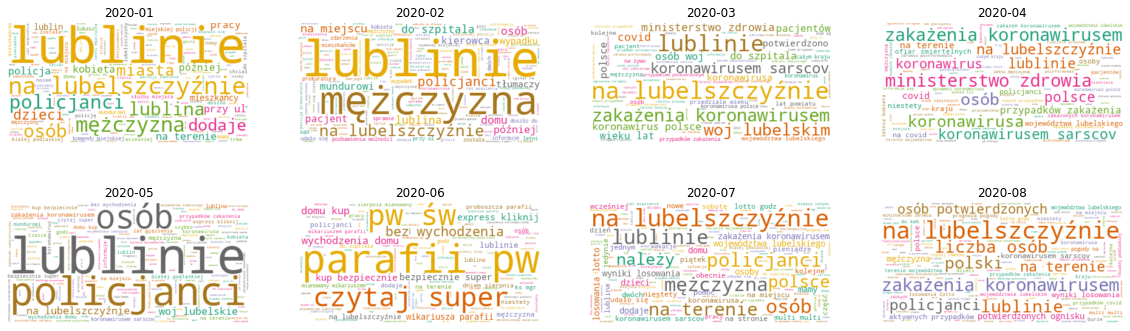

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 16]

full_names = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08"]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()